In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:
R = Runner(classifier='kunet3plus2d',
           discriminator='cnnplus',
           filter_num_down=[16, 32, 64, 128, 256], 
           filter_num_skip=[16, 16, 16, 16], 
           filter_num_aggregate=32, 
           stack_num_down=2, 
           stack_num_up=1, 
           activation='ReLU', 
           output_activation='Sigmoid', 
           batch_norm=False, 
           pool=False, 
           unpool=False, 
           deep_supervision=False, 
           optimizer=None, 
           loss=None,
           metric=None
          )

KUNet3Plus2D: <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f305d7f8100>, <function binary_crossentropy at 0x7f305db1bc10>, [<tensorflow.python.eager.def_function.Function object at 0x7f3065c9af10>]
*** GP2  KUNet3Plus2D ***
Working directory: /tmp/tmpovpghwjxGP2
Using  discriminator (CNN+)


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

In [5]:
images = images[:5000]
masks = masks[:5000]

In [6]:
images.shape

(5000, 512, 512, 1)

In [7]:
masks.shape

(5000, 512, 512, 1)

In [8]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [ ]:
R.run(images=images, masks=masks, weights=weights, runs=3)

Weights OK!
******
Loop 0
Epoch 1/100
4/4 [==============================] - 43s 7s/step - loss: 0.5241 - dice_coef: 0.1119 - val_loss: 0.6812 - val_dice_coef: 0.1612
Epoch 2/100
4/4 [==============================] - 4s 1s/step - loss: 0.4575 - dice_coef: 0.1397 - val_loss: 0.6850 - val_dice_coef: 0.1621
Epoch 3/100
4/4 [==============================] - 4s 1s/step - loss: 0.4221 - dice_coef: 0.1611 - val_loss: 0.6879 - val_dice_coef: 0.1631
Epoch 4/100
4/4 [==============================] - 4s 1s/step - loss: 0.3969 - dice_coef: 0.1780 - val_loss: 0.6900 - val_dice_coef: 0.1641
Epoch 5/100
4/4 [==============================] - 4s 1s/step - loss: 0.3724 - dice_coef: 0.1967 - val_loss: 0.6928 - val_dice_coef: 0.1656
Epoch 6/100
4/4 [==============================] - 4s 1s/step - loss: 0.3460 - dice_coef: 0.2223 - val_loss: 0.6958 - val_dice_coef: 0.1681
Epoch 7/100
4/4 [==============================] - 4s 1s/step - loss: 0.3187 - dice_coef: 0.2547 - val_loss: 0.6971 - val_dice_coef: 

In [ ]:
R.classifier_scores

In [ ]:
R.discriminator_scores

In [ ]:
R.plot()

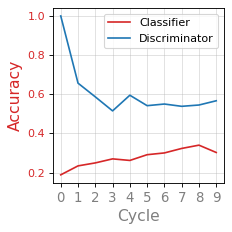

In [18]:
R.plot()

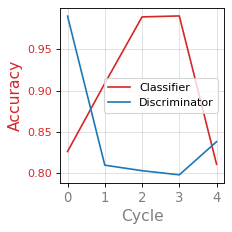

In [17]:
R.plot()